In [1]:
from keras.models import Sequential, load_model
from keras.layers import Convolution2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import MaxPooling2D
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [2]:


train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)
print("\nTraining the data...\n")
training_set = train_datagen.flow_from_directory('Data/train',
                                                 target_size=(224,224),
                                                 batch_size=12,
                                                 class_mode='categorical'
                                                 )

test_set = test_datagen.flow_from_directory('Data/test',
                                            target_size=(224,224),
                                            batch_size=12,
                                            class_mode='categorical'
                                            )
print("\n Testing the data.....\n")


Training the data...

Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.

 Testing the data.....



In [3]:
classifier = Sequential()

# 1st model

classifier.add(Convolution2D(512, (3, 3), input_shape=(224, 224, 3), activation='relu',strides=(3,3)))

classifier.add(MaxPooling2D(pool_size=(3, 3)))

classifier.add(Convolution2D(256, (2, 2), activation='relu'))

classifier.add(MaxPooling2D(pool_size=(1, 1)))

classifier.add(Flatten())

classifier.add(Dense(units=64, activation='relu'))

classifier.add(Dense(units=10, activation='softmax'))

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history=classifier.fit_generator(training_set,epochs = 20,validation_data = test_set,verbose = 1)

classifier.save("models/Cnn.h5")


C:\Users\ymts0585\AppData\Local\Temp\ipykernel_11556\145495211.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=classifier.fit_generator(training_set,epochs = 20,validation_data = test_set,verbose = 1)


Epoch 1/20
3334/3334 [==============================] - 1995s 598ms/step - loss: 0.7288 - accuracy: 0.7566 - val_loss: 0.3731 - val_accuracy: 0.8788
Epoch 2/20
3334/3334 [==============================] - 1640s 492ms/step - loss: 0.3488 - accuracy: 0.8868 - val_loss: 0.2137 - val_accuracy: 0.9292
Epoch 3/20
3334/3334 [==============================] - 1642s 492ms/step - loss: 0.2410 - accuracy: 0.9239 - val_loss: 0.1908 - val_accuracy: 0.9431
Epoch 4/20
3334/3334 [==============================] - 5232s 2s/step - loss: 0.1955 - accuracy: 0.9381 - val_loss: 0.1557 - val_accuracy: 0.9496
Epoch 5/20
3334/3334 [==============================] - 1846s 554ms/step - loss: 0.1650 - accuracy: 0.9468 - val_loss: 0.1242 - val_accuracy: 0.9591
Epoch 6/20
3334/3334 [==============================] - 1734s 520ms/step - loss: 0.1495 - accuracy: 0.9508 - val_loss: 0.1400 - val_accuracy: 0.9546
Epoch 7/20
3334/3334 [==============================] - 1781s 534ms/step - loss: 0.1338 - accuracy: 0.9574 - 

C:\Users\ymts0585\AppData\Local\Temp\ipykernel_11556\981205184.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(history.history['accuracy'],'r',label='Testing accuracy',color='green')


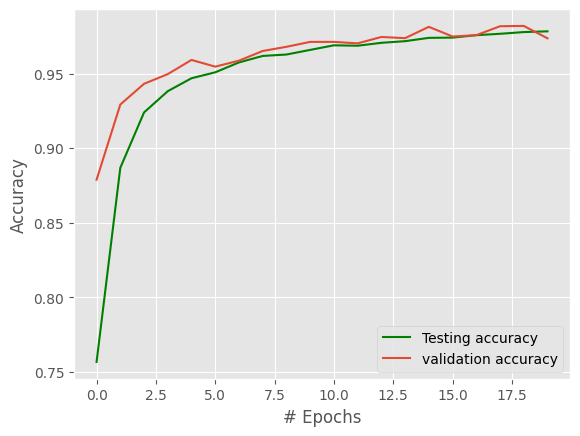

C:\Users\ymts0585\AppData\Local\Temp\ipykernel_11556\981205184.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(history.history['loss'],'r',label='Testing accuracy',color='green')


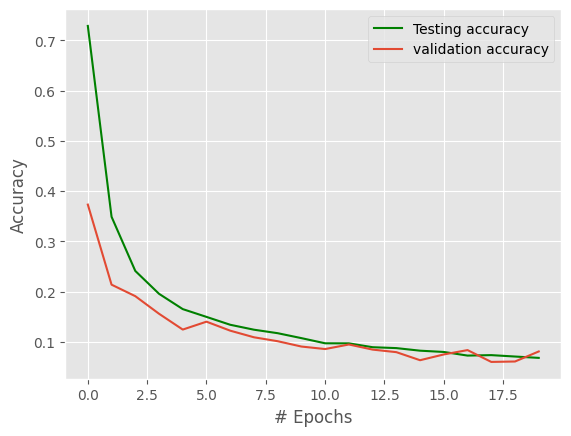

0.9782750010490417


In [4]:
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['accuracy'],'r',label='Testing accuracy',color='green')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("models/cnn_acc.png")
plt.show()


plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['loss'],'r',label='Testing accuracy',color='green')
plt.plot(history.history['val_loss'],label='validation accuracy')
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("models/cnn_loss.png")
plt.show()


acc=history.history['accuracy'][-1]
print(acc)
